In [10]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from keras.datasets import mnist

In [11]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)
print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [12]:
noise_factor = 0.4
x_train_noisy = train_x + noise_factor * np.random.normal(size=train_x.shape) 
x_test_noisy = test_x + noise_factor * np.random.normal(size=test_x.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

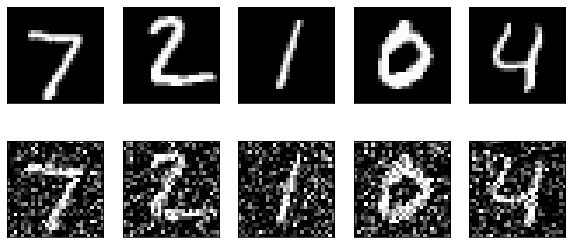

In [13]:
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [14]:
input_size=784

## input layer
input_layer = Input(shape=(input_size,))

encode_layer1 = Dense(128, activation='relu')(input_layer)
encode_layer2 = Dense(64, activation='relu')(encode_layer1)

code_layer   = Dense(32, activation='sigmoid')(encode_layer2)

decode_layer1 = Dense(64, activation='relu')(code_layer)
decode_layer2 = Dense(128, activation='relu')(decode_layer1)

## output layer
output_layer  = Dense(784,activation='sigmoid')(decode_layer2)

In [15]:
autoencoder = Model(input_layer, output_layer)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 784)               101136    
Total para

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, train_x, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.2246
Epoch 2/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1568
Epoch 3/10
60000/60000 [==============================] - 22s 358us/step - loss: 0.1406
Epoch 4/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.1326
Epoch 5/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.1280
Epoch 6/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.1248
Epoch 7/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.1221
Epoch 8/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.1199
Epoch 9/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.1184
Epoch 10/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.1169


In [17]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

<Figure size 720x504 with 0 Axes>

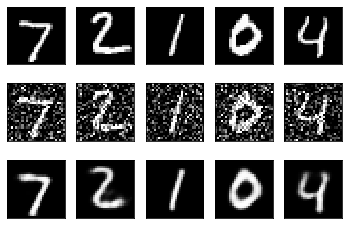

In [18]:
for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')